✅ Setup Complete. Libraries installed.
⬇️ Downloading data for TSLA...


/tmp/ipython-input-3923310022.py:41: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(STOCK_SYMBOL, start=START_DATE, end=END_DATE, progress=False)


📊 Data shape: (2737, 5)
Price           Close       High        Low       Open    Volume
Date                                                            
2015-01-02  14.620667  14.883333  14.217333  14.858000  71466000
2015-01-05  14.006000  14.433333  13.810667  14.303333  80527500
2015-01-06  14.085333  14.280000  13.614000  14.004000  93928500
2015-01-07  14.063333  14.318667  13.985333  14.223333  44526000
2015-01-08  14.041333  14.253333  14.000667  14.187333  51637500
✅ Dataset successfully reshaped to: (2737, 1)


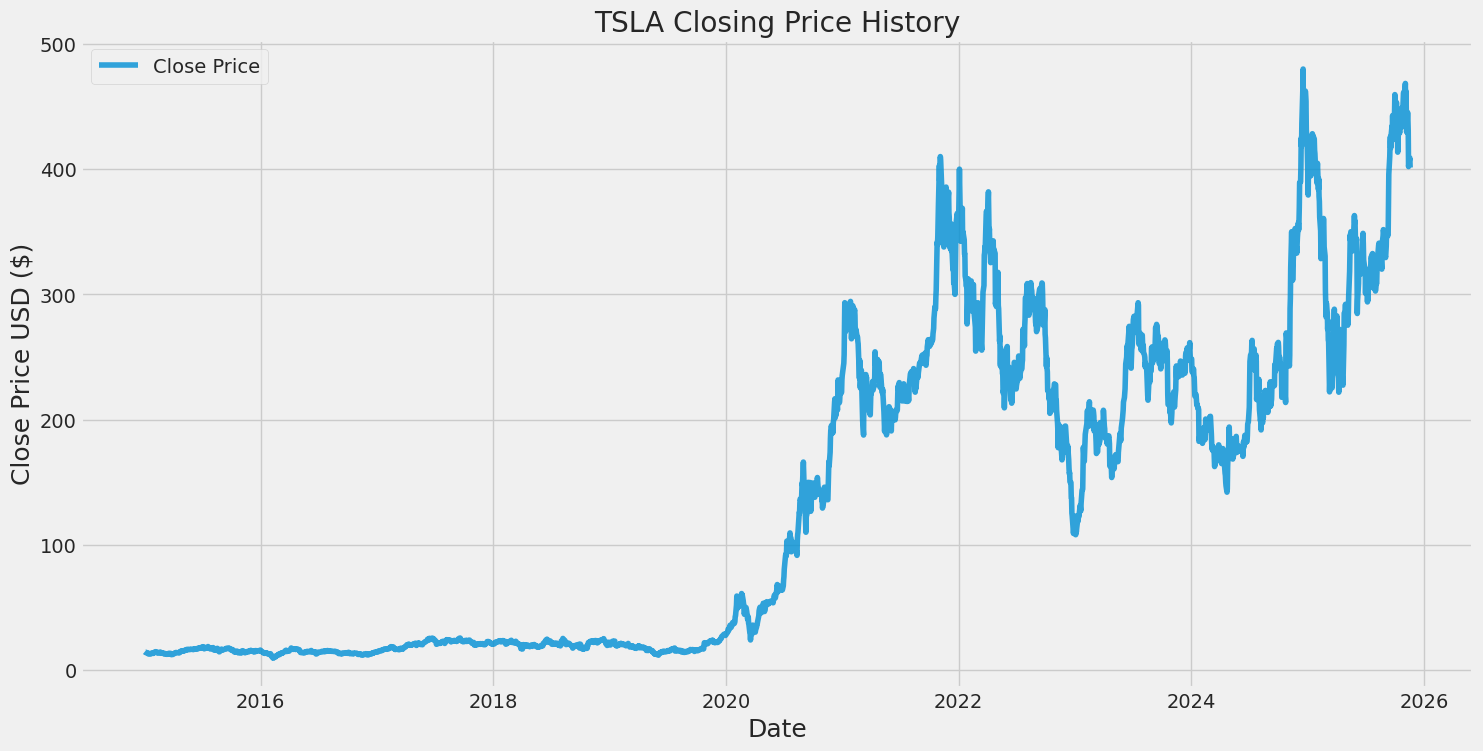

✅ Training data ready. Shape: (2130, 60, 1)
🚀 Training Model (Approx 1-2 mins)...
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - loss: 0.0204
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 8.0009e-04
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 7.3532e-04
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 7.8552e-04
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 7.0639e-04
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 5.5233e-04
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 4.7574e-04
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 4.7057e-04
Epoch 9/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 4.0771e-04
Epoch 10/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 4.0494e-04
Epoch 11/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 4.1022e-04
Epoch 12/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 4.1916e-04
Epoch 13/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 4.1788e-04
Epoch 14/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 3.5180e-04
Epoch 15/20
67/67 ━━━━━━━━━━━━

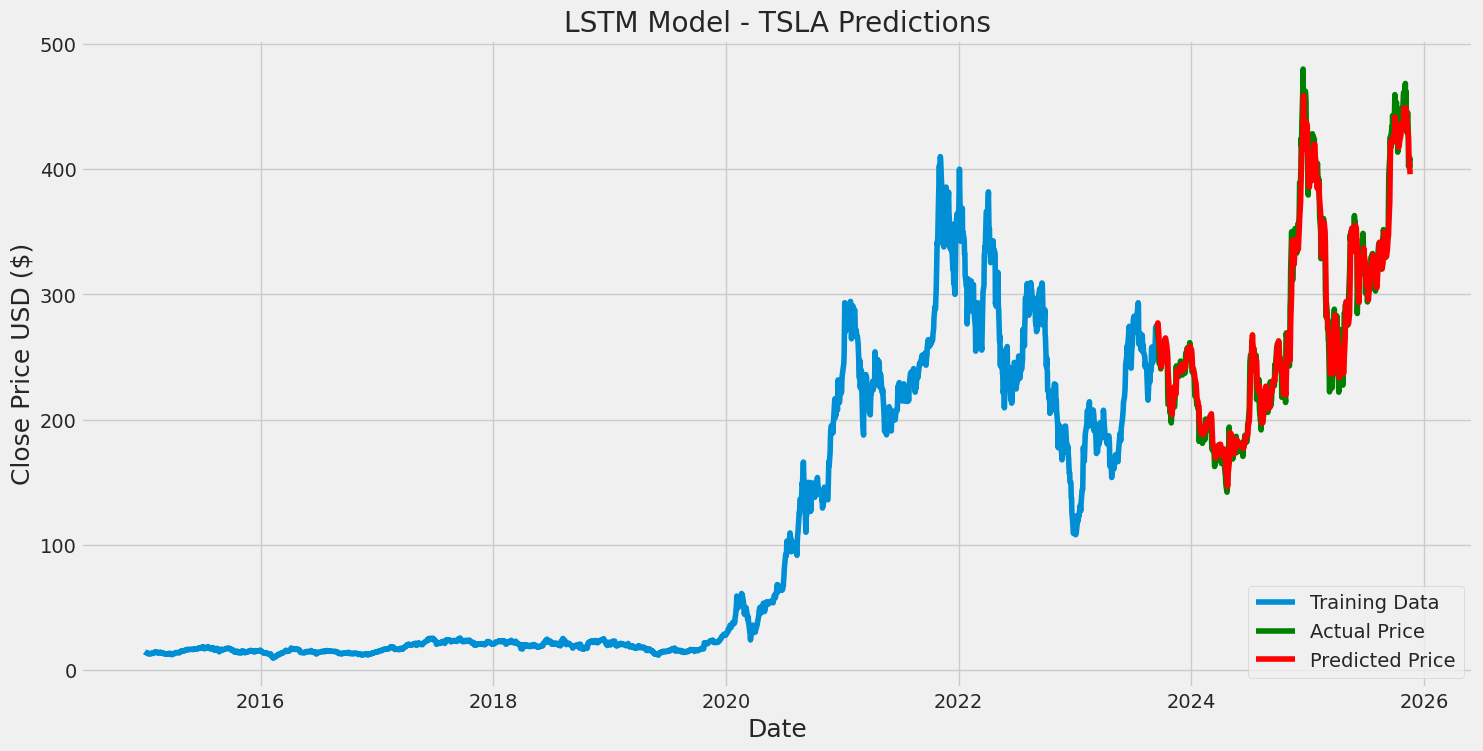

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

FINAL RESULTS SUMMARY: TSLA
Data Range:       2015-01-01 to 2025-11-19
Model Error (RMSE): 13.83
--------------------------------------------------
Last Closing Price:  $401.25
Predicted Next Price: $393.53


In [ ]:
# ==============================================================================
# BLOCK 1: INSTALLATION & SETUP
# ==============================================================================
# Install yfinance for stock data.
# ==============================================================================
!pip install -q yfinance
!pip install -q seaborn

# Import libraries
import math
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Machine Learning libraries
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Styling
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

print("✅ Setup Complete. Libraries installed.")

# ==============================================================================
# BLOCK 2: ROBUST DATA DOWNLOAD & CLEANING (THE FIX)
# ==============================================================================
# We download the data and explicitly handle column formatting to prevent
# the '0 feature' error.
# ==============================================================================

STOCK_SYMBOL = 'TSLA'
START_DATE = '2015-01-01'
END_DATE = datetime.now().strftime('%Y-%m-%d')

print(f"⬇️ Downloading data for {STOCK_SYMBOL}...")
df = yf.download(STOCK_SYMBOL, start=START_DATE, end=END_DATE, progress=False)

# --- FIX FOR YFINANCE COLUMN ISSUES ---
# Sometimes yfinance returns MultiIndex columns (e.g., Price, Ticker).
# We flatten them to ensure we can access 'Close' directly.
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

# Verify we have data
if df.empty:
    raise ValueError("The downloaded dataframe is empty. Please check the ticker symbol.")

print(f"📊 Data shape: {df.shape}")
print(df.head())

# ==============================================================================
# BLOCK 3: PREPARE DATA FOR SCALING
# ==============================================================================
# Here is the specific fix you requested.
# We select the 'Close' column and reshape it to a 2D array (-1, 1).
# -1 lets numpy calculate the row count automatically.
# 1 ensures we have 1 column (Feature).
# ==============================================================================

# 1. Extract the values from the 'Close' column
raw_values = df['Close'].values

# 2. Reshape to 2D array: (n_samples, 1)
dataset = raw_values.reshape(-1, 1)

print(f"✅ Dataset successfully reshaped to: {dataset.shape}")

# ==============================================================================
# BLOCK 4: VISUALIZATION
# ==============================================================================
# Visualizing the raw closing price history.
# ==============================================================================

plt.figure(figsize=(16, 8))
plt.title(f'{STOCK_SYMBOL} Closing Price History')
plt.plot(df.index, dataset, label='Close Price', alpha=0.8)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()

# ==============================================================================
# BLOCK 5: SCALING & SPLITTING
# ==============================================================================
# Normalize data to range [0,1] and split into Train/Test sets.
# ==============================================================================

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Define training size (80%)
training_data_len = math.ceil(len(dataset) * 0.8)

# Create the training data set
train_data = scaled_data[0:training_data_len, :]

# Split into X_train and y_train
x_train = []
y_train = []
PREDICTION_DAYS = 60

for i in range(PREDICTION_DAYS, len(train_data)):
    x_train.append(train_data[i-PREDICTION_DAYS:i, 0]) # Past 60 days
    y_train.append(train_data[i, 0])                   # Current day

# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape for LSTM [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print(f"✅ Training data ready. Shape: {x_train.shape}")

# ==============================================================================
# BLOCK 6: BUILD & TRAIN LSTM MODEL
# ==============================================================================
# Standard LSTM architecture.
# ==============================================================================

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

print("🚀 Training Model (Approx 1-2 mins)...")
model.fit(x_train, y_train, batch_size=32, epochs=20, verbose=1)
print("✅ Training Complete.")

# ==============================================================================
# BLOCK 7: PREDICTIONS & VALIDATION
# ==============================================================================
# Prepare test data, predict, and inverse scale.
# ==============================================================================

# Create test array
test_data = scaled_data[training_data_len - PREDICTION_DAYS: , :]

x_test = []
y_test = dataset[training_data_len:, :] # Actual values (unscaled)

for i in range(PREDICTION_DAYS, len(test_data)):
    x_test.append(test_data[i-PREDICTION_DAYS:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculate RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

# ==============================================================================
# BLOCK 8: FINAL PLOT
# ==============================================================================
# Plot Training vs Actual vs Predicted.
# ==============================================================================

# Create a DataFrame for plotting logic to align indices easily
train = df[:training_data_len].copy()
valid = df[training_data_len:].copy()
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title(f'LSTM Model - {STOCK_SYMBOL} Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train['Close'], label='Training Data')
plt.plot(valid['Close'], label='Actual Price', color='green')
plt.plot(valid['Predictions'], label='Predicted Price', color='red')

plt.legend(loc='lower right')
plt.show()

# ==============================================================================
# BLOCK 9: PREDICT NEXT DAY
# ==============================================================================
# Predict the price for tomorrow using the last 60 days of data.
# ==============================================================================

# Get last 60 days
last_60_days = dataset[-60:]
# Scale
last_60_days_scaled = scaler.transform(last_60_days)
# Reshape (1 sample, 60 time steps, 1 feature)
X_future = []
X_future.append(last_60_days_scaled)
X_future = np.array(X_future)
X_future = np.reshape(X_future, (X_future.shape[0], X_future.shape[1], 1))

# Predict
pred_price = model.predict(X_future)
pred_price_unscaled = scaler.inverse_transform(pred_price)

# ==============================================================================
# BLOCK 10: SUMMARY
# ==============================================================================

print("\n" + "="*50)
print(f"FINAL RESULTS SUMMARY: {STOCK_SYMBOL}")
print("="*50)
print(f"Data Range:       {START_DATE} to {END_DATE}")
print(f"Model Error (RMSE): {rmse:.2f}")
print("-" * 50)
print(f"Last Closing Price:  ${dataset[-1][0]:.2f}")
print(f"Predicted Next Price: ${pred_price_unscaled[0][0]:.2f}")
print("="*50)